# **Data Collection**

## Objectives

* Fetch data from Kaggle and prepare it for further processes

## Inputs

* Kaggle JSOn file - authentication token 

## Outputs

* Generate Dataset: inputs/datasets/housing-prices-data 

## Additional Comments

* No comments 


---

# Change working directory

In [1]:
import numpy
import os

In [2]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues/jupyter_notebooks'

Change the working directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues'

---

# Load Data

In [5]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/house_price_records_cat.csv"))
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856.0,854.0,3.0,No,706.0,GLQ,150.0,548.0,RFn,2003,...,8450.0,65.0,196.0,61.0,5,7,856.0,2003,2003,208500
1,1262.0,0.0,3.0,Gd,978.0,ALQ,284.0,460.0,RFn,1976,...,9600.0,80.0,0.0,0.0,8,6,1262.0,1976,1976,181500
2,920.0,866.0,3.0,Mn,486.0,GLQ,434.0,608.0,RFn,2001,...,11250.0,68.0,162.0,42.0,5,7,920.0,2001,2002,223500
3,796.0,566.0,1.0,No,732.0,GLQ,64.0,480.0,Unf,1993,...,14115.0,85.0,0.0,30.0,5,5,796.0,1993,1995,143000
4,1694.0,0.0,3.0,Av,1369.0,GLQ,317.0,636.0,RFn,2004,...,10084.0,75.0,186.0,57.0,5,8,1686.0,2004,2005,307000


## Data Exploration

*Checking variable type and distribution, missing levels and what these variables mean in a business context*

In [7]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Correlation Study

*Variables are already int or float therefore there is not need to user OneHotEncoder*

In [9]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head()

(797, 37)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,...,BsmtFinType1_None,BsmtFinType1_LwQ,BsmtFinType1_BLQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Fin,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Fa,KitchenQual_Ex
0,856.0,854.0,3.0,706.0,150.0,548.0,2003,1710.0,8450.0,65.0,...,0,0,0,1,0,0,1,0,0,0
1,1262.0,0.0,3.0,978.0,284.0,460.0,1976,1262.0,9600.0,80.0,...,0,0,0,1,0,0,0,1,0,0
2,920.0,866.0,3.0,486.0,434.0,608.0,2001,1786.0,11250.0,68.0,...,0,0,0,1,0,0,1,0,0,0
3,796.0,566.0,1.0,732.0,64.0,480.0,1993,1362.0,14115.0,85.0,...,0,0,0,0,1,0,0,1,0,0
4,1694.0,0.0,3.0,1369.0,317.0,636.0,2004,1694.0,10084.0,75.0,...,0,0,0,1,0,0,1,0,0,0


*I use .corr() for spearman and pearson methods, and investigate the top 10 correlations*

In [10]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual         0.815674
GrLivArea           0.712267
YearBuilt           0.663722
GarageArea          0.627355
GarageFinish_Unf   -0.622838
GarageYrBlt         0.621221
YearRemodAdd        0.617074
KitchenQual_TA     -0.602708
TotalBsmtSF         0.598211
1stFlrSF            0.556682
Name: SalePrice, dtype: float64

In [11]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.794124
GrLivArea         0.705781
GarageArea        0.615975
TotalBsmtSF       0.598380
1stFlrSF          0.593201
KitchenQual_Ex    0.547833
KitchenQual_TA   -0.526552
YearBuilt         0.513021
YearRemodAdd      0.510237
MasVnrArea        0.504320
Name: SalePrice, dtype: float64

*I will use 5 variables with the higehst correlation for further investigation*

In [12]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GarageFinish_Unf',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

I will investigate if
* How 1stFlrSF affects the SalePrice
* How GarageArea affects the SalePrice
* How GarageFinish_Unf affects the SalePrice
* How GrLivArea affects the SalePrice
* How OverallQual affects the SalePrice
* How TotalBsmtSF affects the SalePrice
* How YearBuilt affects the SalePrice
  
NOTICE: I got 7 variables instead of 5

In [13]:
vars_to_study = ['1stFlrSF', 'GarageArea', 'GarageFinish_Unf', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GarageFinish_Unf',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt']

### EDA on Selected variables

In [15]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head()

,1stFlrSF,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,856.0,548.0,1710.0,7,856.0,2003,208500
1,1262.0,460.0,1262.0,6,1262.0,1976,181500
2,920.0,608.0,1786.0,7,920.0,2001,223500
3,796.0,480.0,1362.0,5,796.0,1993,143000
4,1694.0,636.0,1694.0,8,1686.0,2004,307000


#### Variables Distribution by SalePrice

*I plot the distrubution colored by SalePrice*

/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

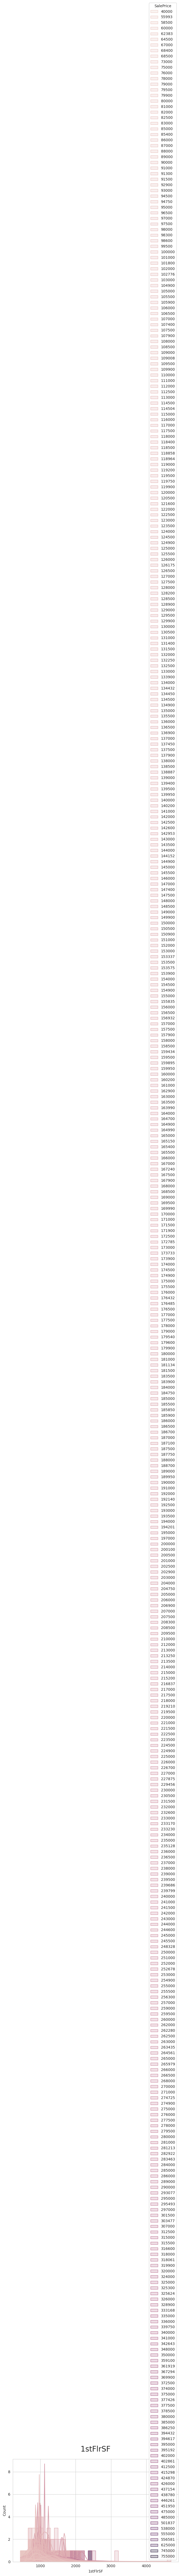

/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

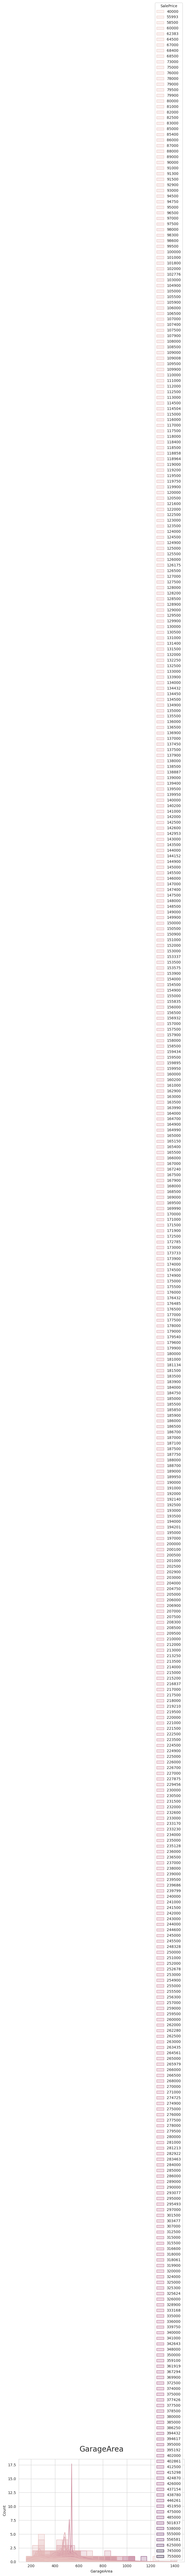

KeyError: 'GarageFinish_Unf'

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12,5))
    sns.countplot(data=df, x=col, hue=target_var,order = df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20,y=1.05)
    plt.show()

def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True,element="step")
    plt.title(f"{col}", fontsize=20,y=1.05)
    plt.show()

target_var = 'SalePrice'
for col in vars_to_study:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [44]:
import os
try:
  os.makedirs(name='outputs/datasets/collection') # create outputs/datasets/collection folder
except Exception as e:
  print(e)

df_house_prices_records.to_csv(f"outputs/datasets/collection/house_price_records_clean.csv", index=False)
df_inherited_houses.to_csv(f"outputs/datasets/collection/inherited_houses_clean.csv", index=False)
